In [66]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
start_time = dt.datetime.now()

In [183]:
data = pd.read_csv('card transactions.csv')
df = pd.read_csv('card transactions.csv')

In [68]:
data.shape

(96753, 18)

In [69]:
data.dtypes

Recnum                 int64
Cardnum                int64
Date                  object
Merchnum              object
Merch description     object
Merch state           object
Merch zip            float64
Transtype             object
Amount               float64
Fraud                  int64
Unnamed: 10          float64
Unnamed: 11          float64
Unnamed: 12          float64
Unnamed: 13          float64
Unnamed: 14          float64
Unnamed: 15          float64
Unnamed: 16          float64
Unnamed: 17          float64
dtype: object

In [70]:
data.describe()

,Recnum,Cardnum,Merch zip,Amount,Fraud,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
count,96753.000000,9.675300e+04,92097.000000,9.675300e+04,96753.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,48377.000000,5.142202e+09,44706.596740,4.278857e+02,0.010945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,27930.329635,5.567084e+04,28369.537945,1.000614e+04,0.104047,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,5.142110e+09,1.000000,1.000000e-02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,24189.000000,5.142152e+09,20855.000000,3.348000e+01,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,48377.000000,5.142196e+09,38118.000000,1.379800e+02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,72565.000000,5.142246e+09,63103.000000,4.282000e+02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,96753.000000,5.142847e+09,99999.000000,3.102046e+06,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
data.dropna(how='all',axis=1,inplace=True)
data['Date']=pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96753 non-null  int64         
 1   Cardnum            96753 non-null  int64         
 2   Date               96753 non-null  datetime64[ns]
 3   Merchnum           93378 non-null  object        
 4   Merch description  96753 non-null  object        
 5   Merch state        95558 non-null  object        
 6   Merch zip          92097 non-null  float64       
 7   Transtype          96753 non-null  object        
 8   Amount             96753 non-null  float64       
 9   Fraud              96753 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 7.4+ MB


In [72]:
data['Date'].max()

Timestamp('2010-12-31 00:00:00')

In [73]:
data['Date'].min()

Timestamp('2010-01-01 00:00:00')

In [74]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2010-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2010-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2010-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2010-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [76]:
data.tail()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
96748,96749,5142276053,2010-12-31,3500000006160,BEST BUY 00001610,KY,41042.0,P,84.79,0
96749,96750,5142225701,2010-12-31,8090710030950,MARKUS OFFICE SUPPLIES,OH,45248.0,P,118.75,0
96750,96751,5142226486,2010-12-31,4503057341100,"TECH PAC, INC",OH,45150.0,P,363.56,0
96751,96752,5142244619,2010-12-31,8834000695412,BUY.COM,CA,92656.0,P,2202.03,0
96752,96753,5142243247,2010-12-31,9108347680006,STAPLES NATIONAL #471,NJ,7606.0,P,554.64,0


In [78]:
dict_value_counts = {}
for i in data.columns.to_list():
    dict_value_counts[i]=data[i].value_counts()

In [25]:
dict_value_counts

{'Recnum': 1        1
 64500    1
 64509    1
 64508    1
 64507    1
         ..
 32250    1
 32249    1
 32248    1
 32247    1
 96753    1
 Name: Recnum, Length: 96753, dtype: int64,
 'Cardnum': 5142148452    1192
 5142184598     921
 5142189108     663
 5142297710     583
 5142223373     579
               ... 
 5142306704       1
 5142135021       1
 5142276358       1
 5142142008       1
 5142233066       1
 Name: Cardnum, Length: 1645, dtype: int64,
 'Date': 2/28/10     684
 8/10/10     610
 3/15/10     594
 9/13/10     564
 9/7/10      536
            ... 
 11/7/10      11
 10/3/10      10
 1/16/10       9
 10/17/10      6
 12/26/10      6
 Name: Date, Length: 365, dtype: int64,
 'Merchnum': 930090121224     9310
 5509006296254    2131
 9900020006406    1714
 602608969534     1092
 4353000719908    1020
                  ... 
 2000021670061       1
 6731000199309       1
 9813800006594       1
 3065107420906       1
 3500000006160       1
 Name: Merchnum, Length: 13091, dtype: 

In [85]:
dict_unique = {}
for i in data.columns.to_list():
    dict_unique[i]=len(data[i].unique())
dict_unique

{'Recnum': 96753,
 'Cardnum': 1645,
 'Date': 365,
 'Merchnum': 13092,
 'Merch description': 13126,
 'Merch state': 228,
 'Merch zip': 4568,
 'Transtype': 4,
 'Amount': 34909,
 'Fraud': 2}

In [86]:
dict_len = {}
for i in data.columns.to_list():
    dict_len[i]=data[i].isnull().count()
dict_len

{'Recnum': 96753,
 'Cardnum': 96753,
 'Date': 96753,
 'Merchnum': 96753,
 'Merch description': 96753,
 'Merch state': 96753,
 'Merch zip': 96753,
 'Transtype': 96753,
 'Amount': 96753,
 'Fraud': 96753}

In [87]:
dict_populated = {}
for i in data.columns.to_list():
    dict_populated[i] = data[i].count()/len(data)*100
dict_populated

{'Recnum': 100.0,
 'Cardnum': 100.0,
 'Date': 100.0,
 'Merchnum': 96.51173607019938,
 'Merch description': 100.0,
 'Merch state': 98.76489617892985,
 'Merch zip': 95.1877461163995,
 'Transtype': 100.0,
 'Amount': 100.0,
 'Fraud': 100.0}

In [88]:
dict_empty = {}
for i in data.columns.to_list():
    dict_empty[i] = pd.isna(data[i]).value_counts()
dict_empty = pd.DataFrame(dict_empty)
dict_empty

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
False,96753.0,96753.0,96753.0,93378,96753.0,95558,92097,96753.0,96753.0,96753.0
True,NaN,NaN,NaN,3375,NaN,1195,4656,NaN,NaN,NaN


In [89]:
data2= data.loc[:, data.dtypes == object]
data2.describe()

,Merchnum,Merch description,Merch state,Transtype
count,93378,96753,95558,96753
unique,13091,13126,227,4
top,930090121224,GSA-FSS-ADV,TN,P
freq,9310,1688,12035,96398


In [90]:
data3= data.loc[:, data.dtypes != object]
data3.describe()

,Recnum,Cardnum,Merch zip,Amount,Fraud
count,96753.000000,9.675300e+04,92097.000000,9.675300e+04,96753.000000
mean,48377.000000,5.142202e+09,44706.596740,4.278857e+02,0.010945
std,27930.329635,5.567084e+04,28369.537945,1.000614e+04,0.104047
min,1.000000,5.142110e+09,1.000000,1.000000e-02,0.000000
25%,24189.000000,5.142152e+09,20855.000000,3.348000e+01,0.000000
50%,48377.000000,5.142196e+09,38118.000000,1.379800e+02,0.000000
75%,72565.000000,5.142246e+09,63103.000000,4.282000e+02,0.000000
max,96753.000000,5.142847e+09,99999.000000,3.102046e+06,1.000000


In [149]:
data['Amount'].zeros()

AttributeError: 'Series' object has no attribute 'zeros'

In [136]:
numerics=['Date','Amount']
categoricals=['Recnum','Cardnum','Merchnum','Merch description','Merch state','Merch zip','Transtype','Fraud']

In [140]:
categorical_data=data.loc[:,categoricals]
populated2=categorical_data.notna().mean()
zeros=categorical_data[categoricals]=='0'
blank=categorical_data.isnull()
unique=categorical_data.nunique(axis=0)
mode=categorical_data.mode().iloc[0,:]
cate_summary=pd.DataFrame(data={'%Populated':(populated2*100).round(2),'# blank':blank.sum(),'#zeroes':zeros.sum(),
                               '# Unique Values':unique.round(2),'Most Common Value':mode})
cate_summary['# Unique Values']=cate_summary['# Unique Values'].apply(lambda x:'{:,}'.format(x))
cate_summary.index.name='Field Name'
cate_summary

,%Populated,# blank,#zeroes,# Unique Values,Most Common Value
Field Name,,,,,
Recnum,100.00,0,0,"96,753",1
Cardnum,100.00,0,0,"1,645",5142148452.0
Merchnum,96.51,3375,231,"13,091",930090121224
Merch description,100.00,0,0,"13,126",GSA-FSS-ADV
Merch state,98.76,1195,0,227,TN
Merch zip,95.19,4656,0,"4,567",38118.0
Transtype,100.00,0,0,4,P
Fraud,100.00,0,0,2,0.0


In [91]:
nan_count = data.isna().sum()
print(nan_count)

Recnum                  0
Cardnum                 0
Date                    0
Merchnum             3375
Merch description       0
Merch state          1195
Merch zip            4656
Transtype               0
Amount                  0
Fraud                   0
dtype: int64


In [107]:
record_len = len(data)
goods = data[data['Fraud'] == 0]
bads = data[data['Fraud'] == 1]
ngoods = len(goods)
nbads = len(bads)
print(ngoods)
print(nbads)

95694
1059


(array([14610, 14641, 14669, 14700, 14730, 14761, 14791, 14822, 14853,
        14883, 14914, 14944, 14974]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

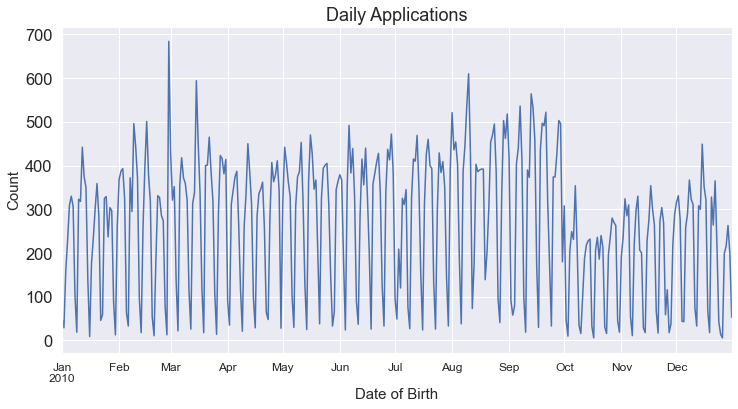

In [125]:
daily_count = data.assign(trx = np.ones(record_len)).set_index(data['Date']).resample(dt.timedelta(days = 1))\
    .count().trx
daily_count.plot(title = 'Daily Applications',figsize=(12,6))
plt.ylabel('Count')
plt.xlabel('Date of Birth',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12)

<AxesSubplot:title={'center':'Daily Applicationss'}, xlabel='Date'>

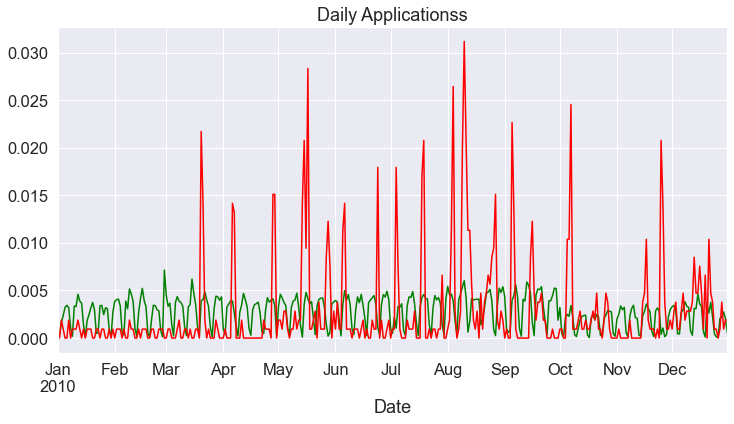

In [126]:
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(dt.timedelta(days = 1)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Daily Applicationss', color = 'green',figsize=(12,6))
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(dt.timedelta(days = 1)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

<Figure size 14400x720 with 0 Axes>

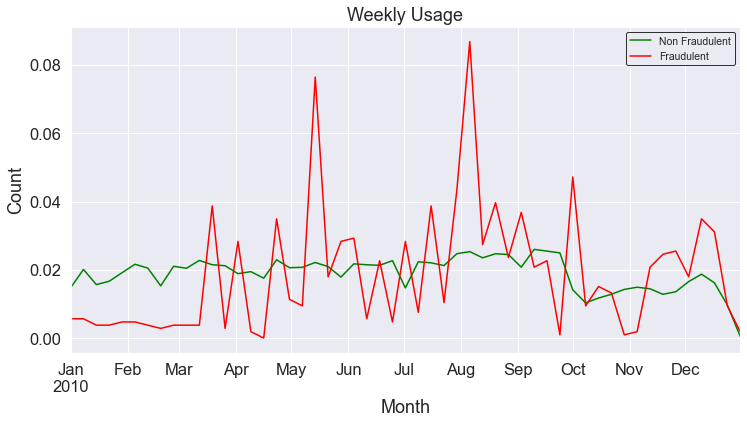

<Figure size 14400x720 with 0 Axes>

In [212]:
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(dt.timedelta(days = 7)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Weekly Usage', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(dt.timedelta(days = 7)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red',figsize=(12,6))
plt.xlabel('Month') 
plt.ylabel('Count')
plt.legend(["Non Fraudulent", "Fraudulent"], loc ="upper right", fontsize='xx-small', edgecolor='black')
plt.figure(figsize=(200,10))

<AxesSubplot:title={'center':'Monthly transcations'}, xlabel='Date'>

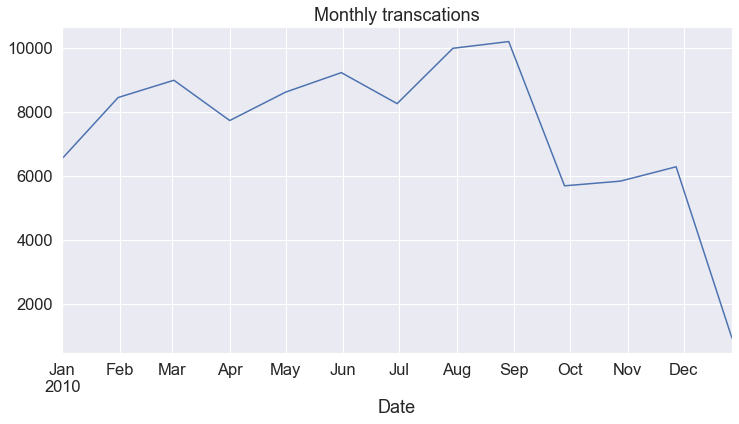

In [208]:
data['Date']=pd.to_datetime(data['Date'])


#daily_count = data.assign(trx = np.ones(numrecords)).set_index(data['Date']).resample(dt.timedelta(days = 1))\
#    .count().trx
#daily_count.plot(title = 'Daily transcations')


daily_count = data.assign(trx = np.ones(numrecords)).set_index(data['Date']).resample(dt.timedelta(days = 30))\
    .count().trx
daily_count.plot(title = 'Monthly transcations',figsize=(12,6))

In [115]:
from datetime import datetime
import datetime
data['Date'] = pd.to_datetime(data['Date'])
data['day_of_week'] = data['Date'].dt.day_name()
data['day_of_week']

0        Friday
1        Friday
2        Friday
3        Friday
4        Friday
          ...  
96748    Friday
96749    Friday
96750    Friday
96751    Friday
96752    Friday
Name: day_of_week, Length: 96753, dtype: object

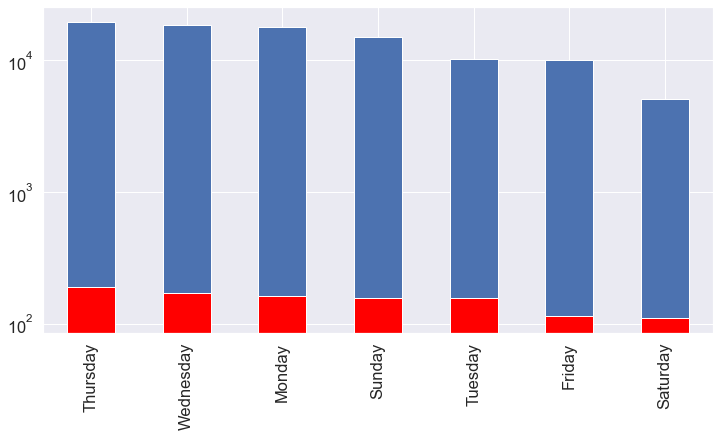

In [127]:
count_days = data.groupby('day_of_week').count()
data['day_of_week'].value_counts().head(15).plot(kind = 'bar')
goods = data[data['Fraud'] == 0]
bads = data[data['Fraud'] == 1]
bads['day_of_week'].value_counts().head(15).plot(kind = 'bar', color='red',figsize=(12,6))
plt.yscale('log')

In [185]:
#b.groupby(by=[b.index.month, b.index.year])
data['Date'] = pd.to_datetime(data['Date'])
data['month'] = data['Date'].dt.month_name()
data['month']

0         January
1         January
2         January
3         January
4         January
           ...   
96748    December
96749    December
96750    December
96751    December
96752    December
Name: month, Length: 96753, dtype: object

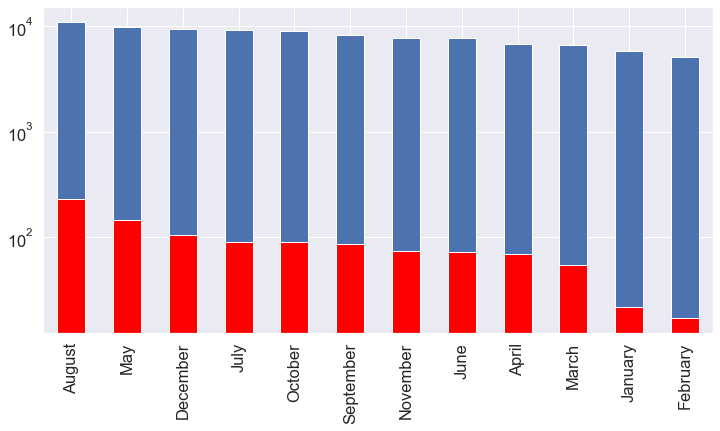

In [214]:
count_days = data.groupby('month').count()
data['month'].value_counts().head(15).plot(kind = 'bar', logy= False)
goods = data[data['Fraud'] == 0]
bads = data[data['Fraud'] == 1]
bads['month'].value_counts().head(15).plot(kind = 'bar', color='red',figsize=(12,6),logy= False)
plt.yscale('log')

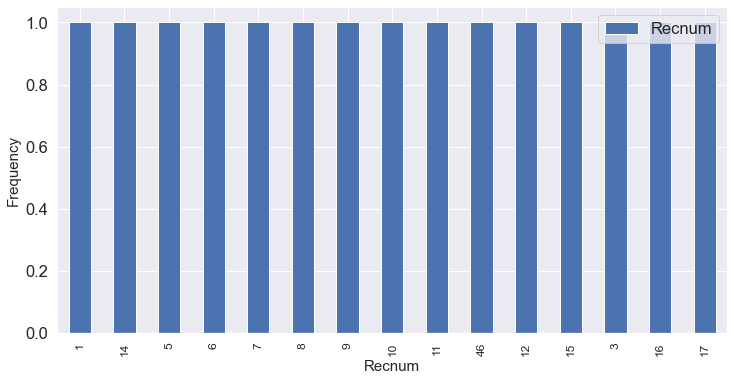

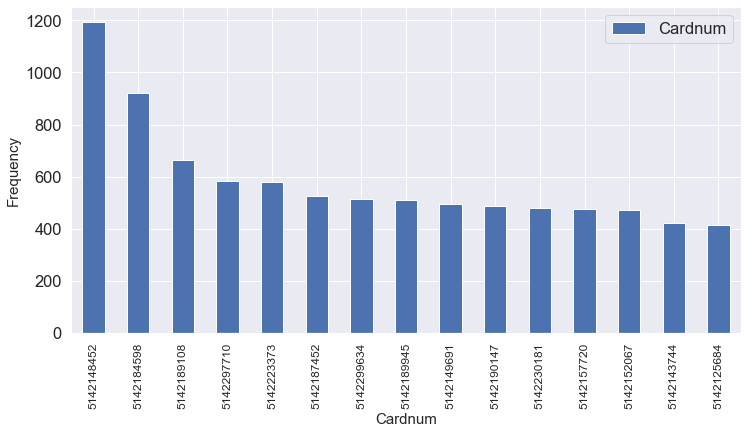

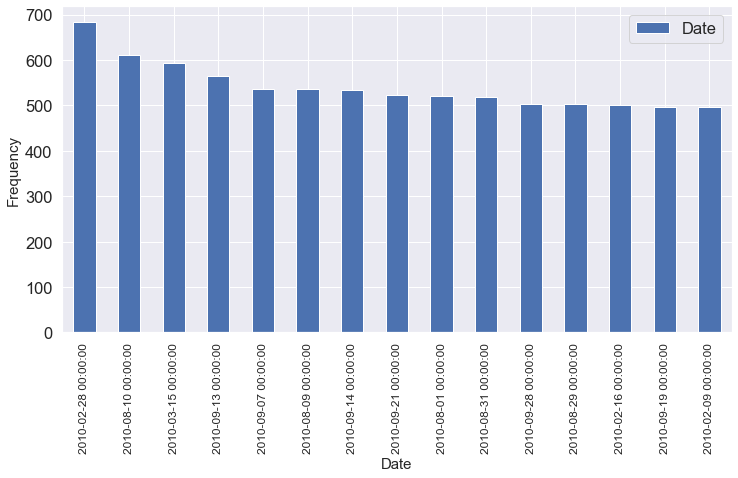

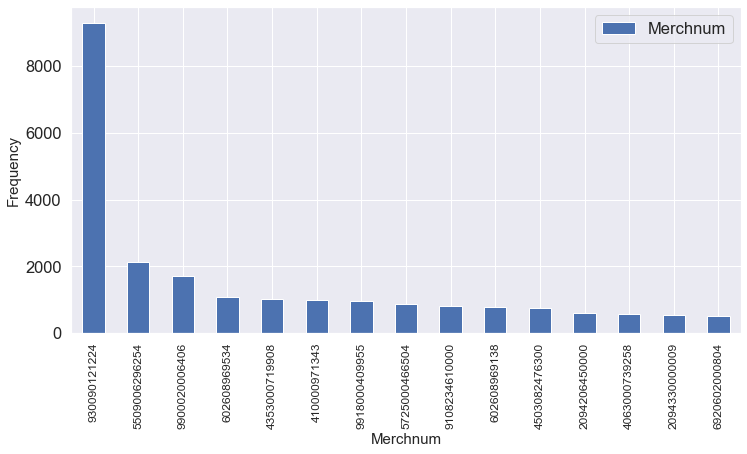

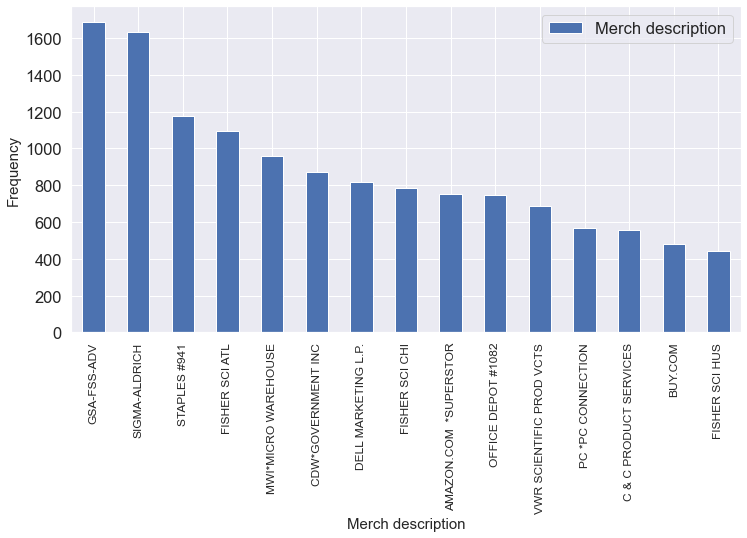

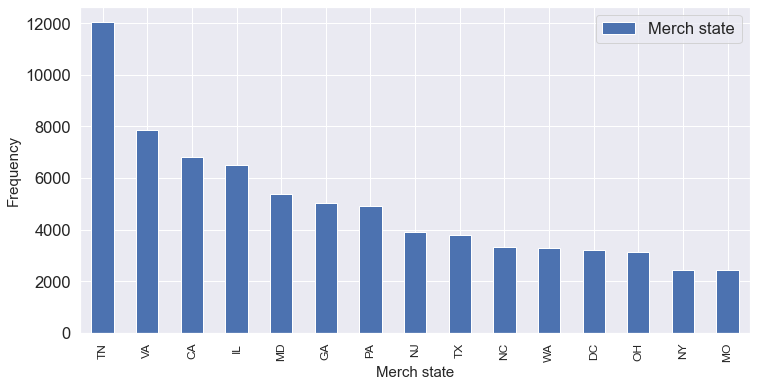

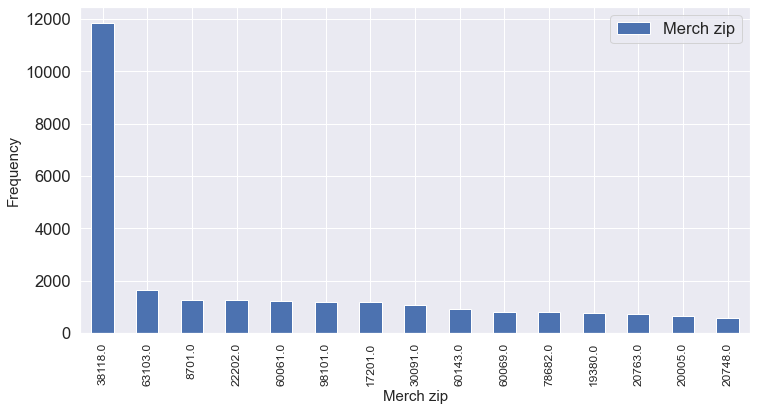

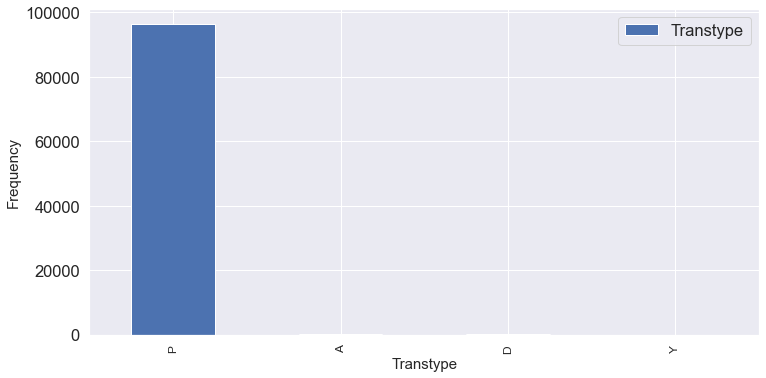

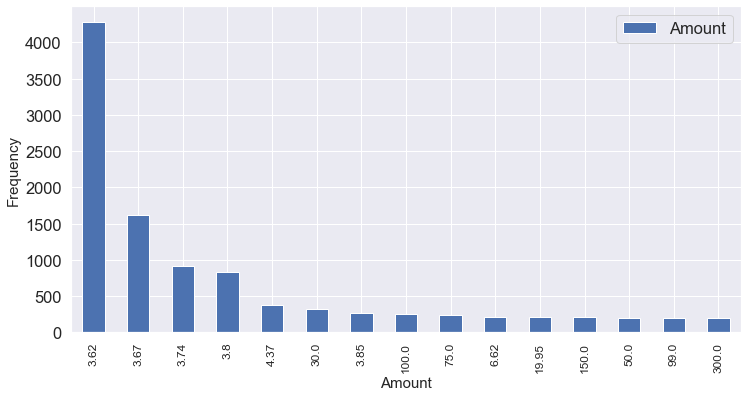

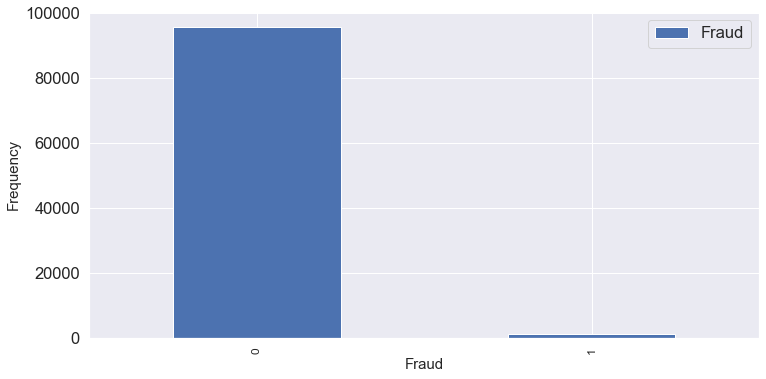

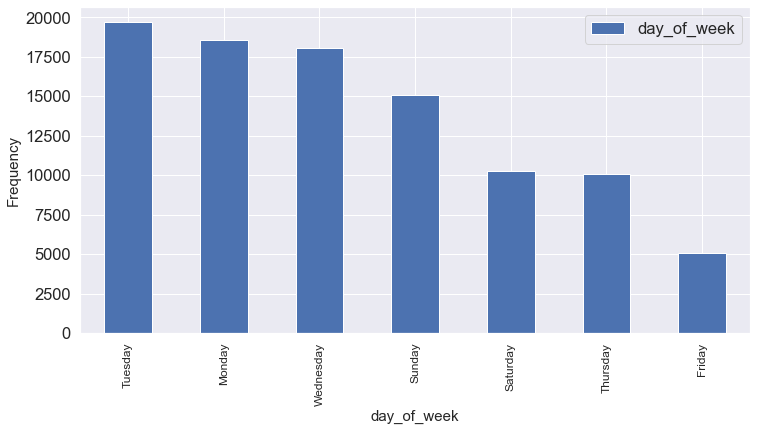

In [120]:
categoricalVar=data.columns.tolist()
for col in categoricalVar:
    df = pd.DataFrame(data[col].value_counts().sort_values(ascending=False).head(15))
    df.plot(kind='bar',figsize=(12,6))
    plt.xlabel(col,fontsize=15)
    plt.ylabel('Frequency',fontsize=15)
    plt.xticks(fontsize=12)


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Tuesday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Saturday'),
  Text(5, 0, 'Thursday'),
  Text(6, 0, 'Friday')])

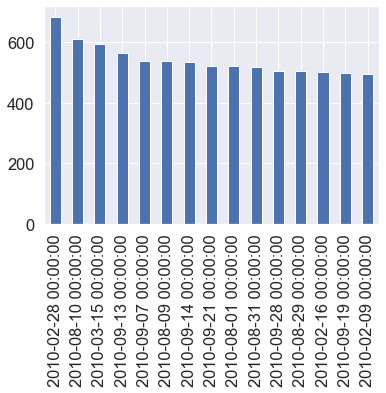

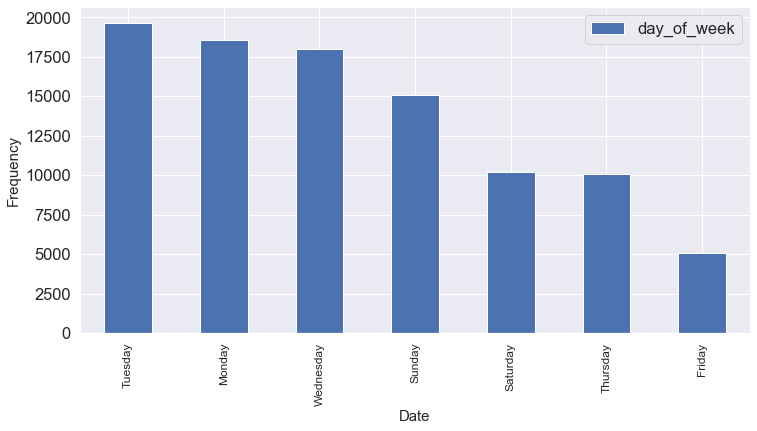

In [121]:
sns.set(font_scale=1.5)
data['Date'].value_counts().head(15).plot(kind = 'bar')
df.plot(kind='bar',figsize=(12,6))
plt.xlabel('Date',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)


Text(0, 0.5, 'Frequency')

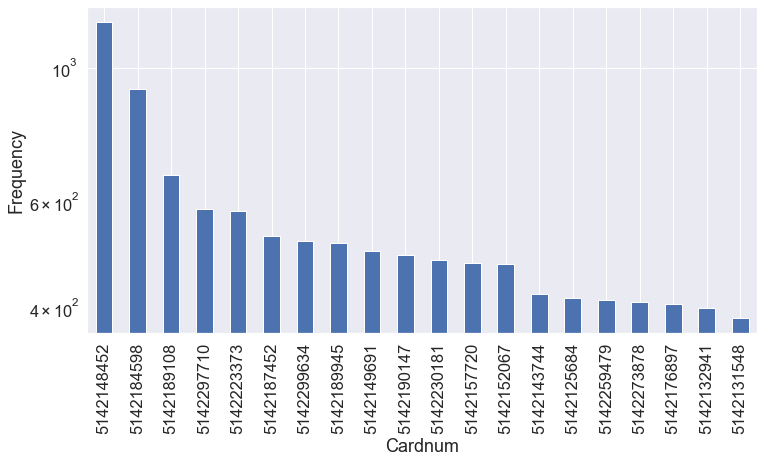

In [159]:
sns.set(font_scale=1.5)
data['Cardnum'].value_counts().head(20).plot(kind = 'bar',figsize=(12,6))
plt.yscale('log')
plt.xlabel('Cardnum') 
plt.ylabel('Frequency')
#plt.legend(loc ="upper right", fontsize='xx-small', edgecolor='black')

In [157]:
print(data['Cardnum'].value_counts()[5142148452])

1192


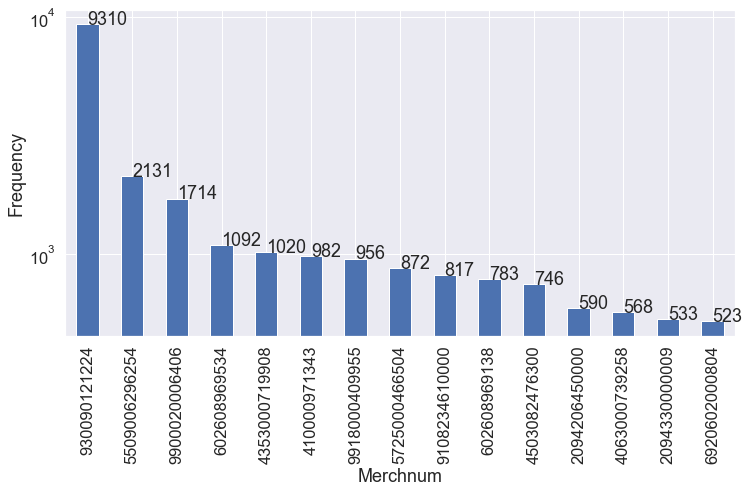

In [225]:
sns.set(font_scale=1.5)

arr= data['Merchnum'].value_counts().head(15)

for i in range(len(arr)):
    plt.text(i,arr[i],arr[i])

data['Merchnum'].value_counts().head(15).plot(kind = 'bar',figsize=(12,6))
plt.yscale('log')
plt.xlabel('Merchnum') 
plt.ylabel('Frequency')
plt.show()

In [163]:
print(data['Merchnum'].value_counts())

930090121224     9310
5509006296254    2131
9900020006406    1714
602608969534     1092
4353000719908    1020
                 ... 
2000021670061       1
6731000199309       1
9813800006594       1
3065107420906       1
3500000006160       1
Name: Merchnum, Length: 13091, dtype: int64


Text(0, 0.5, 'Frequency')

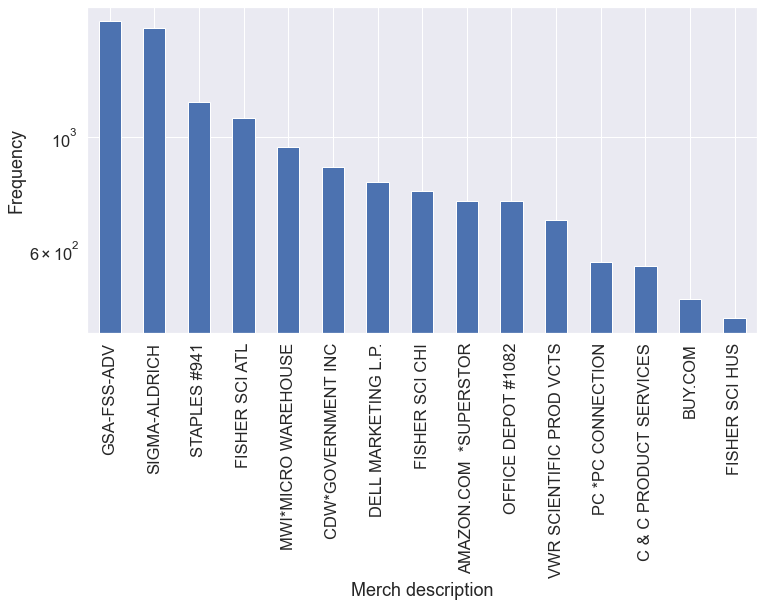

In [166]:
sns.set(font_scale=1.5)
data['Merch description'].value_counts().head(15).plot(kind = 'bar',figsize=(12,6))
plt.yscale('log')
plt.xlabel('Merch description') 
plt.ylabel('Frequency')

In [167]:
print(data['Merch description'].value_counts())

GSA-FSS-ADV                 1688
SIGMA-ALDRICH               1635
STAPLES #941                1174
FISHER SCI ATL              1093
MWI*MICRO WAREHOUSE          958
                            ... 
HBD INC                        1
SALES MARKETING MAGAZINE       1
PATTERSON'S TRUE VALUE         1
FLOPPY COPY                    1
BEST BUY      00001610         1
Name: Merch description, Length: 13126, dtype: int64


Text(0, 0.5, 'frequency')

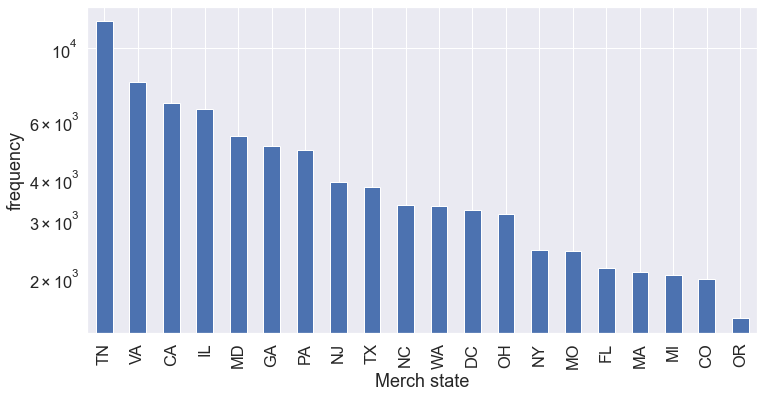

In [168]:
sns.set(font_scale=1.5)
data['Merch state'].value_counts().head(20).plot(kind = 'bar',figsize=(12,6))
plt.yscale('log')
plt.xlabel('Merch state') 
plt.ylabel('frequency')

In [170]:
print(data['Merch state'].value_counts())

TN     12035
VA      7872
CA      6817
IL      6508
MD      5398
       ...  
495        1
376        1
458        1
546        1
116        1
Name: Merch state, Length: 227, dtype: int64


Text(0, 0.5, 'frequency')

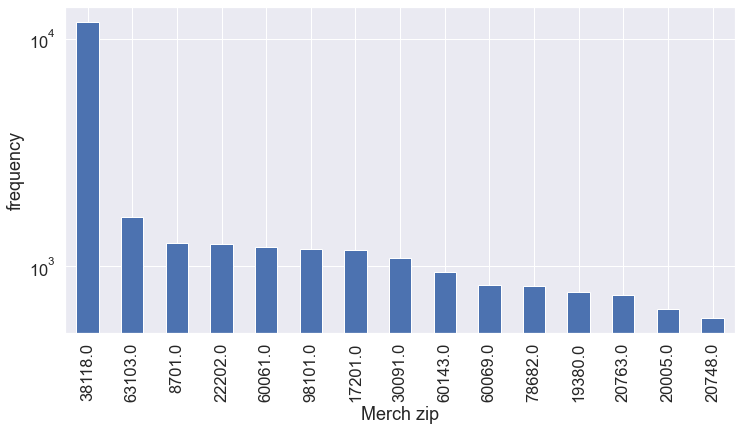

In [132]:
sns.set(font_scale=1.5)
data['Merch zip'].value_counts().head(15).plot(kind = 'bar',figsize=(12,6))
plt.yscale('log')
plt.xlabel('Merch zip') 
plt.ylabel('frequency')

In [171]:
print(data['Merch zip'].value_counts())

38118.0    11868
63103.0     1650
8701.0      1267
22202.0     1250
60061.0     1221
           ...  
89125.0        1
46225.0        1
27025.0        1
6076.0         1
36043.0        1
Name: Merch zip, Length: 4567, dtype: int64


Text(0, 0.5, 'frequency')

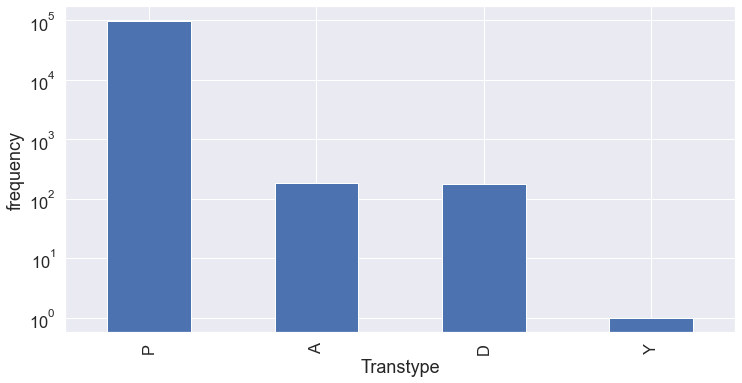

In [133]:
sns.set(font_scale=1.5)
data['Transtype'].value_counts().head(15).plot(kind = 'bar',figsize=(12,6))
plt.yscale('log')
plt.xlabel('Transtype') 
plt.ylabel('frequency')

In [172]:
print(data['Transtype'].value_counts())

P    96398
A      181
D      173
Y        1
Name: Transtype, dtype: int64


Text(0, 0.5, 'frequency')

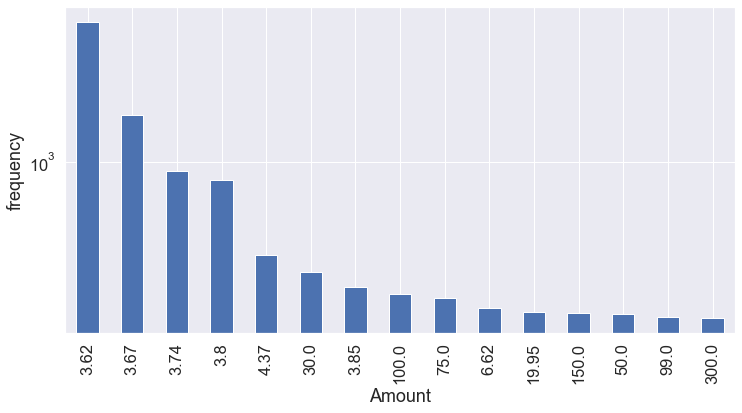

In [134]:
sns.set(font_scale=1.5)
data['Amount'].value_counts().head(15).plot(kind = 'bar',figsize=(12,6))
plt.yscale('log')
plt.xlabel('Amount') 
plt.ylabel('frequency')

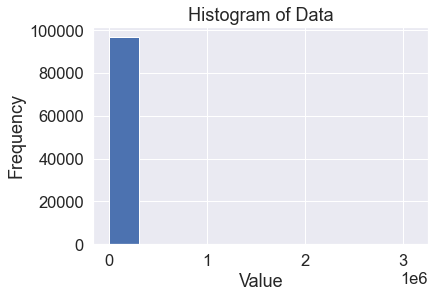

In [194]:
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
df['Amount'] = df['Amount'].astype('int64')
#sns.distplot(data.Amount, hist=False)
#plt.show()

plt.hist(data.Amount, bins=10)

# add a title and labels to the plot
plt.title("Histogram of Data")
plt.xlabel("Value")
plt.ylabel("Frequency")

# display the plot
plt.show()

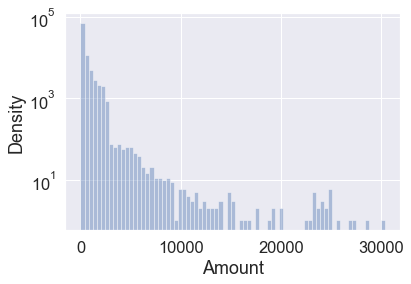

In [232]:
floor = 40000
amount = data[data['Amount'] <= floor]
sns.distplot(amount['Amount'],bins = 75, kde = False)
plt.xlabel('Amount')
plt.ylabel('Density')
plt.yscale('log')
#plt.title(label="log scale distribution of  transaction (amount<40000) in 100 bins",
#          fontsize=15,
#          color="green")


plt.savefig('08Amount.png',bbox_inches = 'tight')

In [192]:
df['Amount'].dtypes

dtype('int64')

In [175]:
print(data['Amount'].value_counts())

3.62       4283
3.67       1620
3.74        913
3.80        827
4.37        378
           ... 
949.29        1
2303.00       1
303.72        1
183.36        1
554.64        1
Name: Amount, Length: 34909, dtype: int64


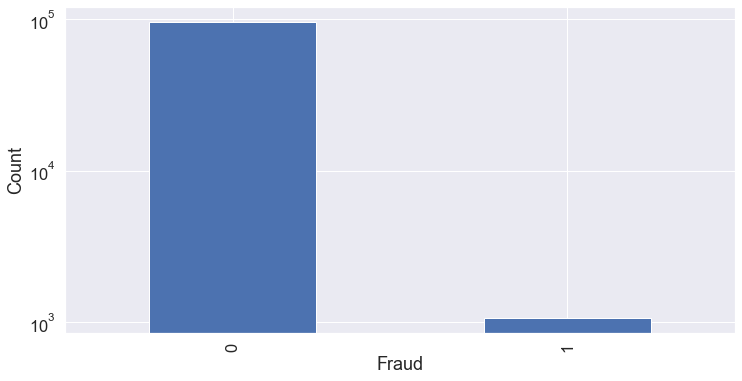

In [135]:
data['Fraud'].value_counts().head(15).plot(kind='bar',logy=True,figsize=(12,6))
plt.xlabel('Fraud') 
plt.ylabel('Count')
plt.yscale('log')
#plt.legend(["Non fraudulent activity count", "fraud activity count"], loc ="upper right", fontsize='xx-small', edgecolor='black')

In [174]:
print(data['Fraud'].value_counts())

0    95694
1     1059
Name: Fraud, dtype: int64
